## What is Fake News?

#### Fake news is false or misleading information presented as news. It often has the aim of damaging the reputation of a person or entity, or making money through advertising revenue. Fake news can be spread through social media, email, and other online platforms.

## About Dataset
#### This dataset consists of about 40000 articles consisting of fake as well as real news. Our aim is train our model so that it can correctly predict whether a given piece of news is real or fake. The fake and real news data is given in two separate datasets with each dataset consisting around 20000 articles each.

In [ ]:
# pip install spacy
# pip install wordcloud

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import spacy
import nltk
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import keras
from keras.preprocessing import text,sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout

import warnings
warnings.filterwarnings('ignore')

from nltk.tokenize import word_tokenize

from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
from wordcloud import WordCloud
%matplotlib inline

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 2.	Load and Check Data

In [3]:
true = pd.read_csv("C:\\Users\\DELL\\Desktop\\P-272\\True.csv",encoding='latin-1')
fake = pd.read_csv("C:\\Users\\DELL\\Desktop\\P-272\\Fake.csv",encoding='latin-1')

In [4]:
true.shape

(21417, 4)

In [5]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fake.shape

(23481, 4)

In [7]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
# add column
true['target'] = 1
fake['target'] = 0

In [9]:
# Merging the 2 datasets
df= pd.concat([true, fake], ignore_index= True, sort= False)

In [10]:
df.head(5)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [11]:
df.shape

(44898, 5)

In [12]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [13]:
df.dtypes

title      object
text       object
subject    object
date       object
target      int64
dtype: object

## 3.	Visualization
Explain the plots in layman term so the client can also understand what is happening, if they ask then explain in detail.
### 1. Count of Fake and True Data

0    23481
1    21417
Name: target, dtype: int64


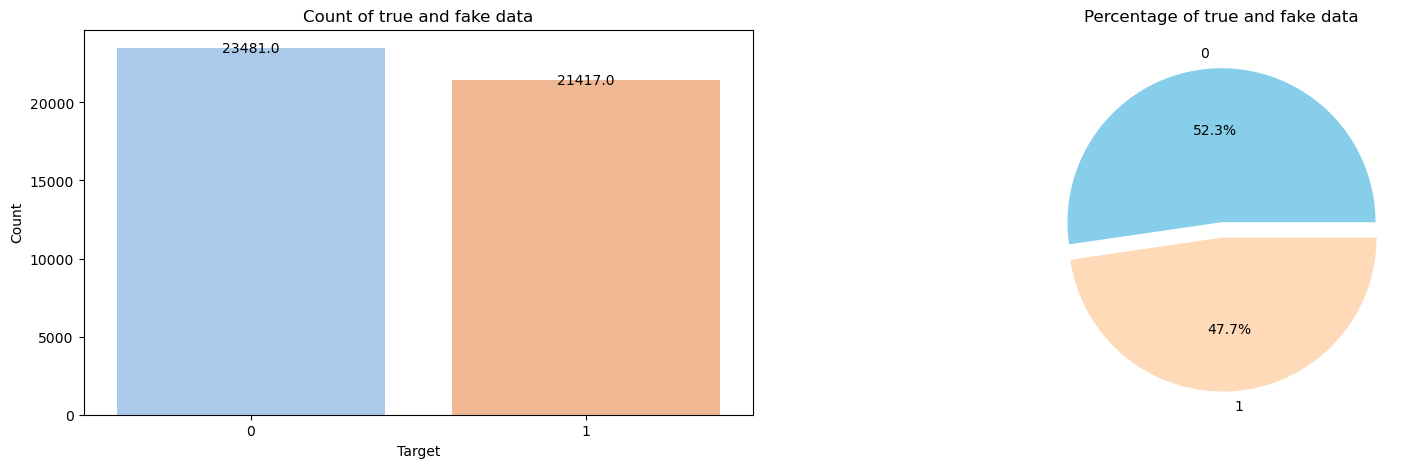

In [14]:
print(df["target"].value_counts())

fig, ax = plt.subplots(1, 2, figsize=(19, 5))

# Count plot
g1 = sns.countplot(x="target", data=df, ax=ax[0], palette="pastel")
g1.set_title("Count of true and fake data")
g1.set_ylabel("Count")
g1.set_xlabel("Target")
for p in g1.patches:
    g1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center')

# Pie chart
g2 = ax[1].pie(df["target"].value_counts().values,
               explode=[0, 0.1],
               labels=df.target.value_counts().index,
               autopct='%1.1f%%',
               colors=['SkyBlue', 'PeachPuff'])
ax[1].set_title("Percentage of true and fake data")

plt.show()

### 2. Distribution of the subject according to true and fake data

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64


Text(0.5, 1.0, 'Distribution of the subject according to true and fake data')

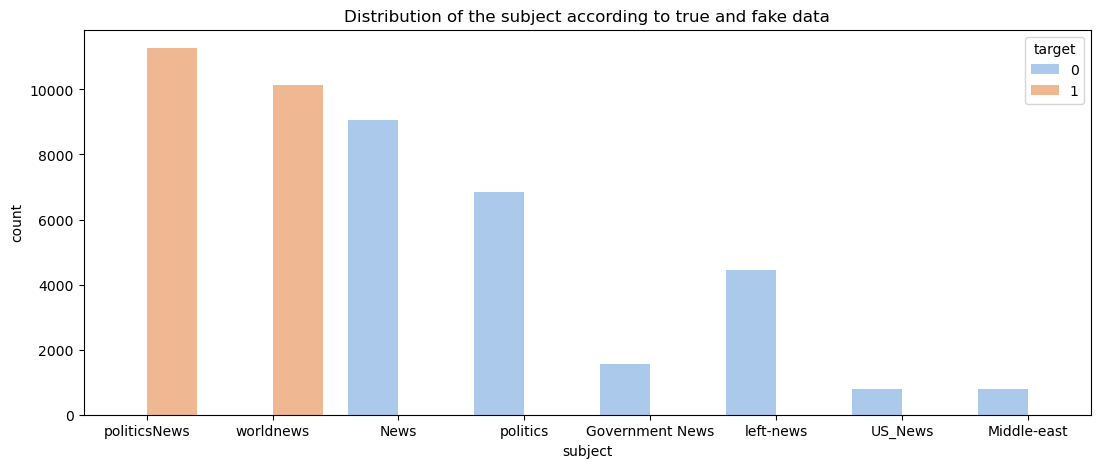

In [15]:
# Stacked Bar Plots
print(df.subject.value_counts())
plt.figure(figsize= (13, 5))

ax= sns.countplot(x= "subject", hue= "target", data= df, palette= "pastel")
plt.title("Distribution of the subject according to true and fake data")

In [16]:
import pandas as pd

# Load your DataFrame
# df = pd.read_csv('your_data.csv')

# Remove rows with URLs in 'date' column
df = df[~df['date'].str.contains('http')]

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Now you can proceed with creating the plots as mentioned earlier

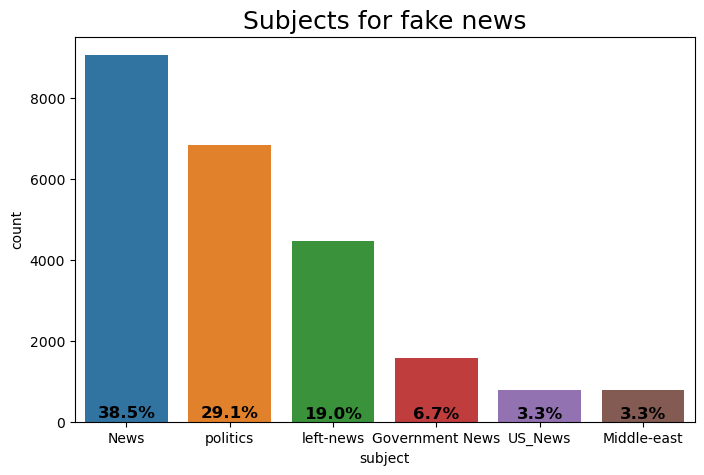

In [17]:
# Assuming you already have the 'fake' DataFrame and the 'subject' column in it.

# Calculate the percentage for each category in the 'subject' column
subject_counts = fake['subject'].value_counts()
total_count = len(fake['subject'])
percentages = (subject_counts / total_count) * 100

# Create the countplot
plt.figure(figsize=(8, 5))
sns.countplot(x='subject', data=fake, order=subject_counts.index)
plt.title('Subjects for fake news', size=18)

# Add the text labels for the percentages
for index, value in enumerate(percentages):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

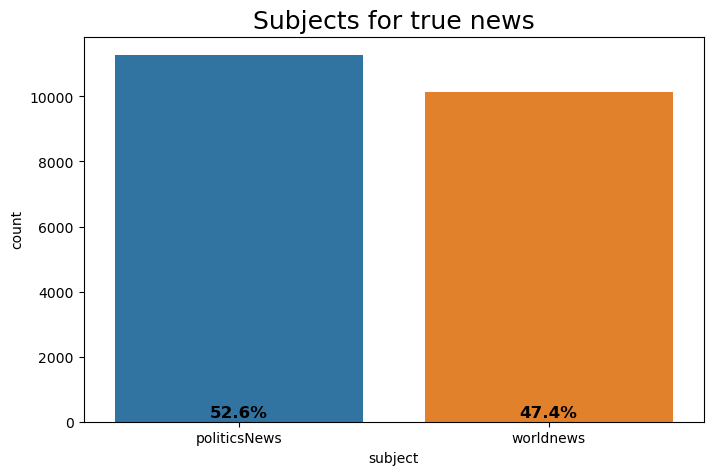

In [18]:
# Assuming you already have the 'true' DataFrame and the 'subject' column in it.

# Calculate the percentage for each category in the 'subject' column
subject_counts = true['subject'].value_counts()
total_count = len(true['subject'])
percentages = (subject_counts / total_count) * 100

# Create the countplot
plt.figure(figsize=(8, 5))
sns.countplot(x='subject', data=true, order=subject_counts.index)
plt.title('Subjects for true news', size=18)

# Add the text labels for the percentages
for index, value in enumerate(percentages):
    plt.text(index, value, f'{value:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

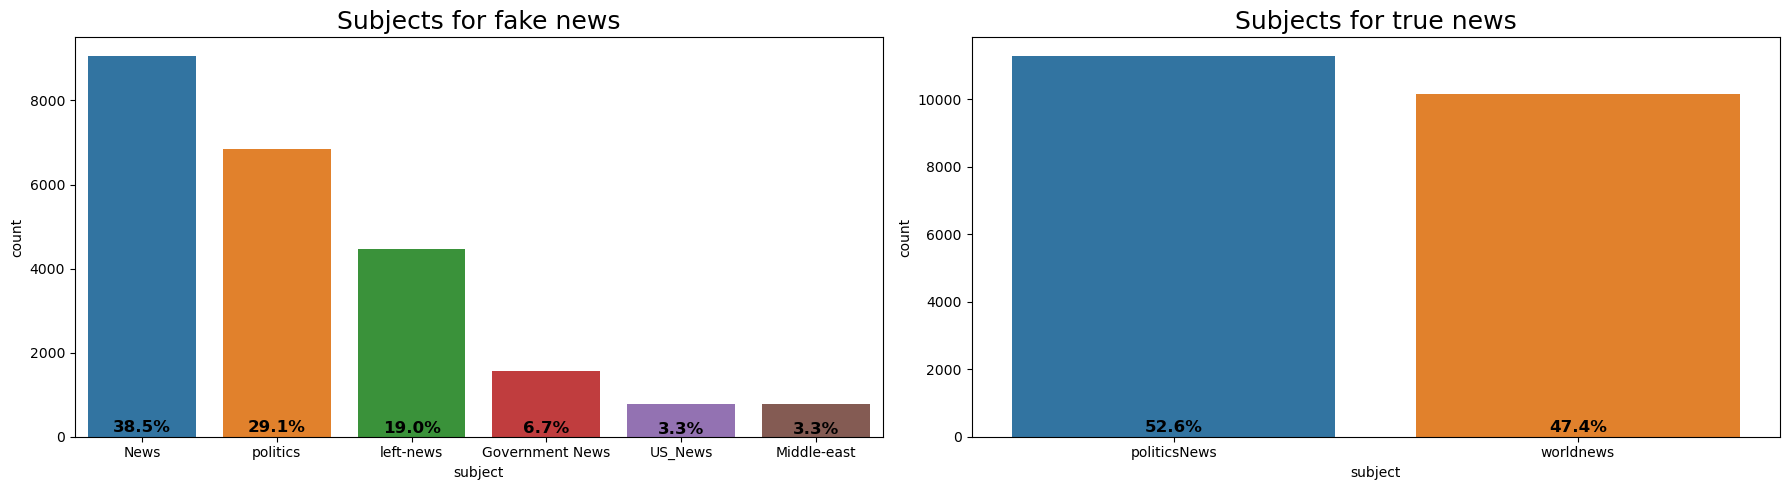

In [19]:
# Assuming you already have the 'fake' and 'true' DataFrames and the 'subject' column in them.

# Calculate the percentage for each category in the 'subject' column for fake news
fake_subject_counts = fake['subject'].value_counts()
fake_total_count = len(fake['subject'])
fake_percentages = (fake_subject_counts / fake_total_count) * 100

# Create the countplot for fake news
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

axes[0].set_title('Subjects for fake news', size=18)
sns.countplot(x='subject', data=fake, order=fake_subject_counts.index, ax=axes[0])

# Add the text labels for the percentages in the fake news plot
for index, value in enumerate(fake_percentages):
    axes[0].text(index, value, f'{value:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Calculate the percentage for each category in the 'subject' column for true news
true_subject_counts = true['subject'].value_counts()
true_total_count = len(true['subject'])
true_percentages = (true_subject_counts / true_total_count) * 100

# Create the countplot for true news
axes[1].set_title('Subjects for true news', size=18)
sns.countplot(x='subject', data=true, order=true_subject_counts.index, ax=axes[1])

# Add the text labels for the percentages in the true news plot
for index, value in enumerate(true_percentages):
    axes[1].text(index, value, f'{value:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


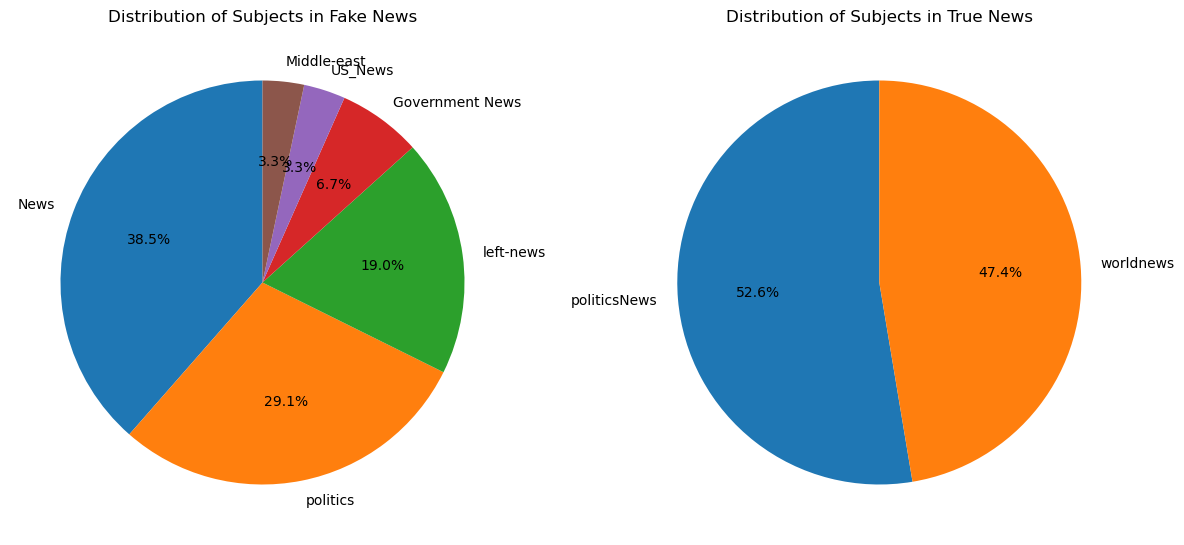

In [20]:
# Calculate the percentage for each category in the 'subject' column for fake news
fake_subject_counts = fake['subject'].value_counts()
fake_total_count = len(fake['subject'])
fake_percentages = (fake_subject_counts / fake_total_count) * 100

# Calculate the percentage for each category in the 'subject' column for true news
true_subject_counts = true['subject'].value_counts()
true_total_count = len(true['subject'])
true_percentages = (true_subject_counts / true_total_count) * 100

# Create a pie chart for the distribution of subjects in fake news
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(fake_subject_counts, labels=fake_subject_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Subjects in Fake News')

# Create a pie chart for the distribution of subjects in true news
plt.subplot(1, 2, 2)
plt.pie(true_subject_counts, labels=true_subject_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Subjects in True News')

plt.tight_layout()
plt.show()


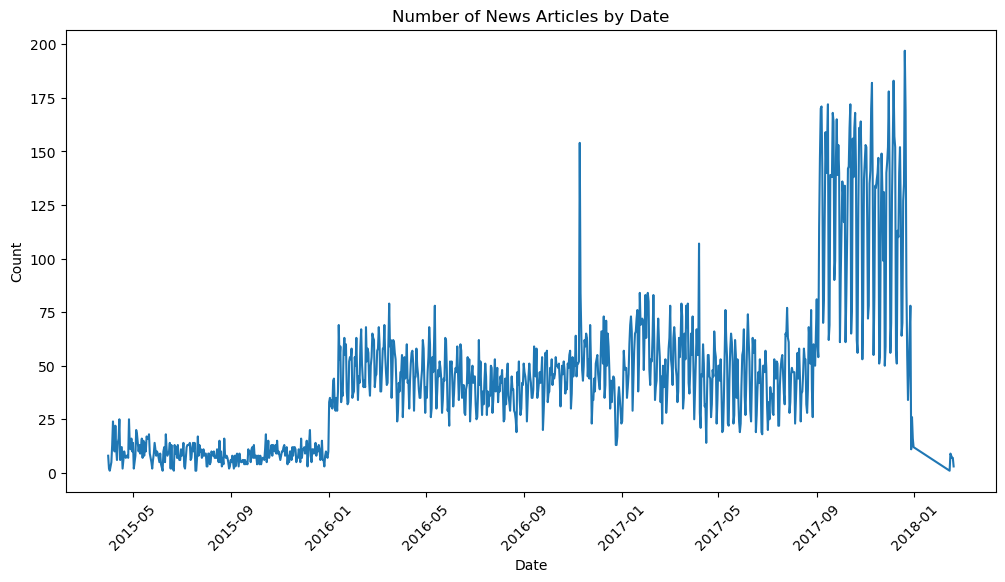

In [21]:
     # Line plot
     df['date'] = pd.to_datetime(df['date'])
     df['date'] = df['date'].dt.date
     date_counts = df['date'].value_counts().sort_index()

     plt.figure(figsize=(12, 6))
     plt.plot(date_counts.index, date_counts.values)
     plt.xlabel('Date')
     plt.ylabel('Count')
     plt.title('Number of News Articles by Date')
     plt.xticks(rotation=45)
     plt.show()


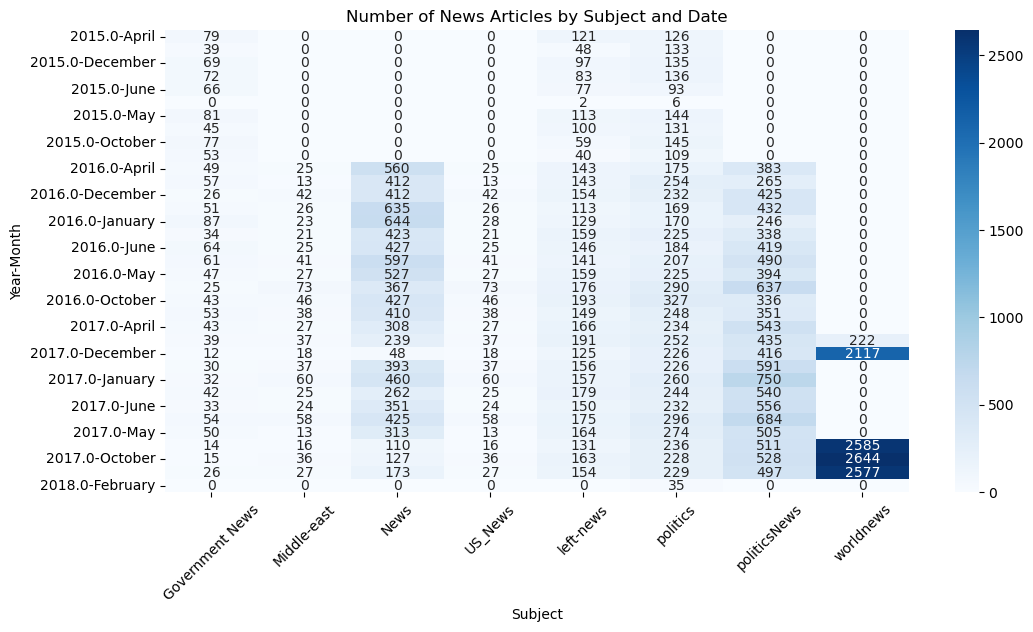

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'df' with columns 'date' and 'subject'

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the year and month from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()

# Group the data by year and month, and count the occurrences of each subject
subject_counts = df.groupby(['year', 'month'])['subject'].value_counts().unstack().fillna(0)

# Plot the data
plt.figure(figsize=(12, 6))
sns.heatmap(subject_counts, cmap='Blues', annot=True, fmt='g', cbar=True)
plt.title('Number of News Articles by Subject and Date')
plt.xlabel('Subject')
plt.ylabel('Year-Month')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Text(0.5, 0.98, 'Time Series Decomposition')

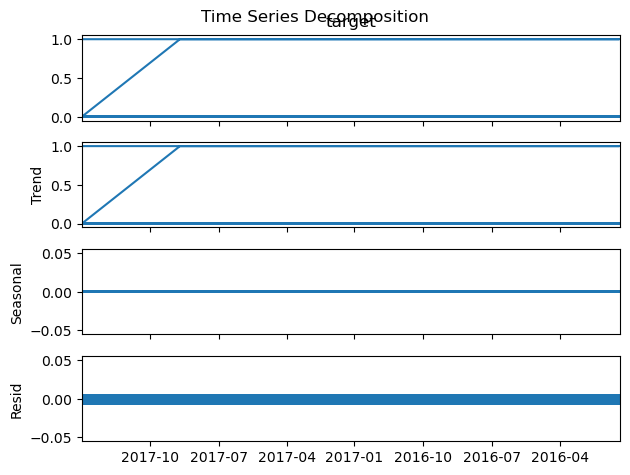

In [23]:
# Time Series Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df.set_index('date')['target'], model='additive', period=1)
result.plot()
plt.suptitle('Time Series Decomposition')

## 4. Data Cleaning

In [24]:
df['text']= df['title'] + " " + df['text'] # This line combines the values from three columns ('subject', 'title', and 'text') into a new column called 'text.' The values from the three columns are concatenated with spaces in between, creating a new column that contains the text from all three columns combined.
del df['title']
del df['year']
del df['month']
df.head()

,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",politicsNews,2017-12-31,1
1,U.S. military to accept transgender recruits o...,politicsNews,2017-12-29,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,politicsNews,2017-12-31,1
3,FBI Russia probe helped by Australian diplomat...,politicsNews,2017-12-30,1
4,Trump wants Postal Service to charge 'much mor...,politicsNews,2017-12-29,1


In [25]:
'''del df['title']
del df['date']
del df['subject']
del df['year']
del df['month']'''

"del df['title']\ndel df['date']\ndel df['subject']\ndel df['year']\ndel df['month']"

In [26]:
first_text =df.text[10] # This line extracts the value from the 'text' column of the DataFrame 'df' at index 10 (assuming the DataFrame has a column named 'text'). The value at index 10 is assigned to the variable 'first_text.'
first_text

'Jones certified U.S. Senate winner despite Moore challenge (Reuters) - Alabama officials on Thursday certified Democrat Doug Jones the winner of the state\x19s U.S. Senate race, after a state judge denied a challenge by Republican Roy Moore, whose campaign was derailed by accusations of sexual misconduct with teenage girls. Jones won the vacant seat by about 22,000 votes, or 1.6 percentage points, election officials said. That made him the first Democrat in a quarter of a century to win a Senate seat in Alabama.  The seat was previously held by Republican Jeff Sessions, who was tapped by U.S. President Donald Trump as attorney general. A state canvassing board composed of Alabama Secretary of State John Merrill, Governor Kay Ivey and Attorney General Steve Marshall certified the election results. Seating Jones will narrow the Republican majority in the Senate to 51 of 100 seats. In a statement, Jones called his victory \x1ca new chapter\x1d and pledged to work with both parties. Moore

### I.	Removal of HTML Contents
•	HTML tags, if present, are removed from the text data.

In [27]:
# !pip install bs4

In [28]:
from bs4 import BeautifulSoup # This line imports the BeautifulSoup class from the bs4 library. BeautifulSoup is a popular library used for parsing HTML and XML documents.

soup = BeautifulSoup(first_text, "html.parser") # This line creates a BeautifulSoup object named soup. It takes two arguments: the HTML content to parse (first_text) and the parser to use ("html.parser" in this case). The parser is used to convert the HTML content into a structured parse tree that makes it easy to navigate and extract data.
first_text= soup.get_text() # This line extracts the text content from the soup object and stores it back in the variable first_text. The get_text() method is used to get the plain text from the parsed HTML, excluding any HTML tags or markup.
first_text # This line likely prints or outputs the value of the variable first_text after extracting the text content from the HTML. The output will be the text without any HTML tags or markup, only the plain text content that was present in the original first_text.

'Jones certified U.S. Senate winner despite Moore challenge (Reuters) - Alabama officials on Thursday certified Democrat Doug Jones the winner of the state\x19s U.S. Senate race, after a state judge denied a challenge by Republican Roy Moore, whose campaign was derailed by accusations of sexual misconduct with teenage girls. Jones won the vacant seat by about 22,000 votes, or 1.6 percentage points, election officials said. That made him the first Democrat in a quarter of a century to win a Senate seat in Alabama.  The seat was previously held by Republican Jeff Sessions, who was tapped by U.S. President Donald Trump as attorney general. A state canvassing board composed of Alabama Secretary of State John Merrill, Governor Kay Ivey and Attorney General Steve Marshall certified the election results. Seating Jones will narrow the Republican majority in the Senate to 51 of 100 seats. In a statement, Jones called his victory \x1ca new chapter\x1d and pledged to work with both parties. Moore

### II.	Removal of Punctuation Marks and Special Characters
•	Punctuation marks and special characters are removed from the text data except uppercase/lowercase letters using Regular Expressions

In [29]:
print(first_text)

Jones certified U.S. Senate winner despite Moore challenge (Reuters) - Alabama officials on Thursday certified Democrat Doug Jones the winner of the states U.S. Senate race, after a state judge denied a challenge by Republican Roy Moore, whose campaign was derailed by accusations of sexual misconduct with teenage girls. Jones won the vacant seat by about 22,000 votes, or 1.6 percentage points, election officials said. That made him the first Democrat in a quarter of a century to win a Senate seat in Alabama.  The seat was previously held by Republican Jeff Sessions, who was tapped by U.S. President Donald Trump as attorney general. A state canvassing board composed of Alabama Secretary of State John Merrill, Governor Kay Ivey and Attorney General Steve Marshall certified the election results. Seating Jones will narrow the Republican majority in the Senate to 51 of 100 seats. In a statement, Jones called his victory a new chapter and pledged to work with both parties. Moore declined 

In [30]:
first_text= re.sub('\[[^]]*\]', ' ', first_text) # uses the re.sub() function to remove any text enclosed in square brackets and replace it with a space. The regular expression '\[[^]]*\]' matches any text that is enclosed in square brackets, and the re.sub() function replaces it with a single space. This step is likely used to remove any text that appears within square brackets, such as references, citations, or annotations.
first_text= re.sub('\[^a-zA-Z]', ' ', first_text) # uses the re.sub() function to replace any non-alphabetic characters with spaces. The regular expression [^a-zA-Z] matches any character that is not an uppercase or lowercase letter. The re.sub() function replaces such non-alphabetic characters with spaces. This step is likely used to eliminate special characters, punctuation, numbers, or other symbols from the text, so only alphabetic characters remain.
first_text= first_text.lower() # converts all the remaining text in first_text from uppercase to lowercase. This step is often taken to standardize the text and avoid case sensitivity during further analysis or processing.
first_text # This line likely prints or outputs the value of the variable first_text after the above preprocessing steps have been applied. The output will be the cleaned and lowercased text, which has been processed to remove text in square brackets and replace non-alphabetic characters with spaces.

'jones certified u.s. senate winner despite moore challenge (reuters) - alabama officials on thursday certified democrat doug jones the winner of the state\x19s u.s. senate race, after a state judge denied a challenge by republican roy moore, whose campaign was derailed by accusations of sexual misconduct with teenage girls. jones won the vacant seat by about 22,000 votes, or 1.6 percentage points, election officials said. that made him the first democrat in a quarter of a century to win a senate seat in alabama.  the seat was previously held by republican jeff sessions, who was tapped by u.s. president donald trump as attorney general. a state canvassing board composed of alabama secretary of state john merrill, governor kay ivey and attorney general steve marshall certified the election results. seating jones will narrow the republican majority in the senate to 51 of 100 seats. in a statement, jones called his victory \x1ca new chapter\x1d and pledged to work with both parties. moore

### III.	Removal of Stopwords
•	Commonly occurring words with little or no significance (stopwords) are removed from the text data like is, a, the...

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
nltk.download("stopwords") # downloads the set of stopwords from the nltk library. Stopwords are common words (e.g., "the," "is," "and") that are often removed from text during text analysis or natural language processing tasks because they do not carry much meaning on their own.
from nltk.corpus import stopwords # imports the 'stopwords' corpus from the nltk library. The 'stopwords' corpus contains a list of common stopwords for various languages.

# we can use tokenize instead of split
first_text= nltk.word_tokenize(first_text) # tokenizes the text in the first_text variable. Tokenization is the process of breaking a text into individual words or tokens. The nltk.word_tokenize() function is used for this purpose. It takes a string of text (first_text) as input and returns a list of tokens (words) from the text.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
# ! pip install --upgrade nltk


In [34]:
first_text= [word for word in first_text if not word in set(stopwords.words("english"))]

In [35]:
print(first_text)

['jones', 'certified', 'u.s.', 'senate', 'winner', 'despite', 'moore', 'challenge', '(', 'reuters', ')', '-', 'alabama', 'officials', 'thursday', 'certified', 'democrat', 'doug', 'jones', 'winner', 'state\x19s', 'u.s.', 'senate', 'race', ',', 'state', 'judge', 'denied', 'challenge', 'republican', 'roy', 'moore', ',', 'whose', 'campaign', 'derailed', 'accusations', 'sexual', 'misconduct', 'teenage', 'girls', '.', 'jones', 'vacant', 'seat', '22,000', 'votes', ',', '1.6', 'percentage', 'points', ',', 'election', 'officials', 'said', '.', 'made', 'first', 'democrat', 'quarter', 'century', 'win', 'senate', 'seat', 'alabama', '.', 'seat', 'previously', 'held', 'republican', 'jeff', 'sessions', ',', 'tapped', 'u.s.', 'president', 'donald', 'trump', 'attorney', 'general', '.', 'state', 'canvassing', 'board', 'composed', 'alabama', 'secretary', 'state', 'john', 'merrill', ',', 'governor', 'kay', 'ivey', 'attorney', 'general', 'steve', 'marshall', 'certified', 'election', 'results', '.', 'seatin

### IV.	Lemmatization
•	Words are reduced to their base or root form using lemmatization techniques. To bring back multiple form of same word to their common root like 'coming', 'comes' into 'come'.

In [36]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
lemma = nltk.WordNetLemmatizer()
first_text= [lemma.lemmatize(word) for word in first_text]

first_text= " ".join(first_text)
first_text

'jones certified u.s. senate winner despite moore challenge ( reuters ) - alabama official thursday certified democrat doug jones winner state\x19s u.s. senate race , state judge denied challenge republican roy moore , whose campaign derailed accusation sexual misconduct teenage girl . jones vacant seat 22,000 vote , 1.6 percentage point , election official said . made first democrat quarter century win senate seat alabama . seat previously held republican jeff session , tapped u.s. president donald trump attorney general . state canvassing board composed alabama secretary state john merrill , governor kay ivey attorney general steve marshall certified election result . seating jones narrow republican majority senate 51 100 seat . statement , jones called victory new chapter pledged work party . moore declined concede defeat even trump urged . stood claim fraudulent election statement released certification said regret , medium outlet reported . alabama judge denied moore\x19s request 

### V.	Perform it for all the examples
•	The cleaning tasks are applied to all examples in the dataset. We performed the steps for a single example. Now let's perform it for all the examples in the data.

In [38]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

# Download stopwords and punkt data if not already done
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Precompute stopwords set
stop_words = set(stopwords.words('english'))

# Removal of HTML Contents
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removal of Punctuation Marks
def remove_punctuations(text):
    return re.sub(r'\[[^]]*\]', '', text)

# Removal of Special Characters
def remove_characters(text):
    return re.sub("[^a-zA-Z]", " ", text)

# Lemmatization and Removal of Stopwords
def remove_stopwords_and_lemmatization(text):
    text = text.lower()
    words = nltk.word_tokenize(text)
    lemma = WordNetLemmatizer()
    final_words = [lemma.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(final_words)

# Total function
def cleaning(text):
    text = remove_html(text)
    text = remove_punctuations(text)
    text = remove_characters(text)
    text = remove_stopwords_and_lemmatization(text)
    return text

# Apply function on text column
df['text'] = df['text'].apply(cleaning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
df.head()

,text,subject,date,target
0,u budget fight loom republican flip fiscal scr...,politicsNews,2017-12-31,1
1,u military accept transgender recruit monday p...,politicsNews,2017-12-29,1
2,senior u republican senator let mr mueller job...,politicsNews,2017-12-31,1
3,fbi russia probe helped australian diplomat ti...,politicsNews,2017-12-30,1
4,trump want postal service charge much amazon s...,politicsNews,2017-12-29,1


## Visualization on new data


## 1. WordCloud for Real/True News


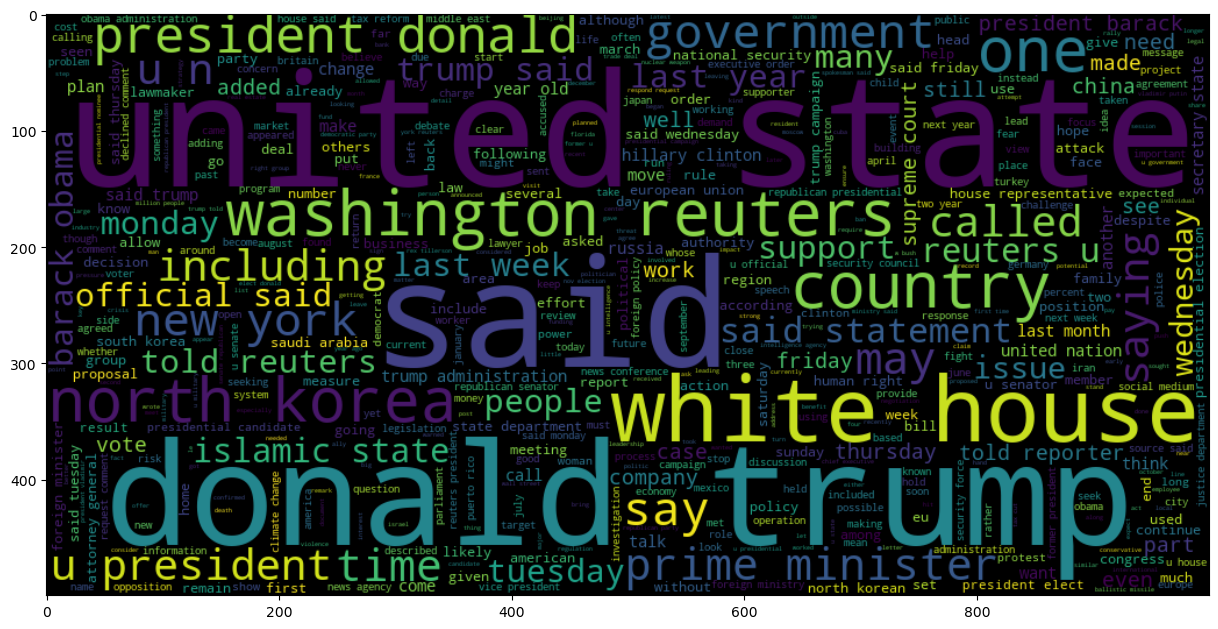

In [40]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(15,15))
wc= WordCloud(max_words= 500, width= 1000, height= 500, stopwords= STOPWORDS).generate(" ".join(df[df.target == 1].text))
plt.imshow(wc, interpolation= 'bilinear')

## 2. WordCloud for Fake News

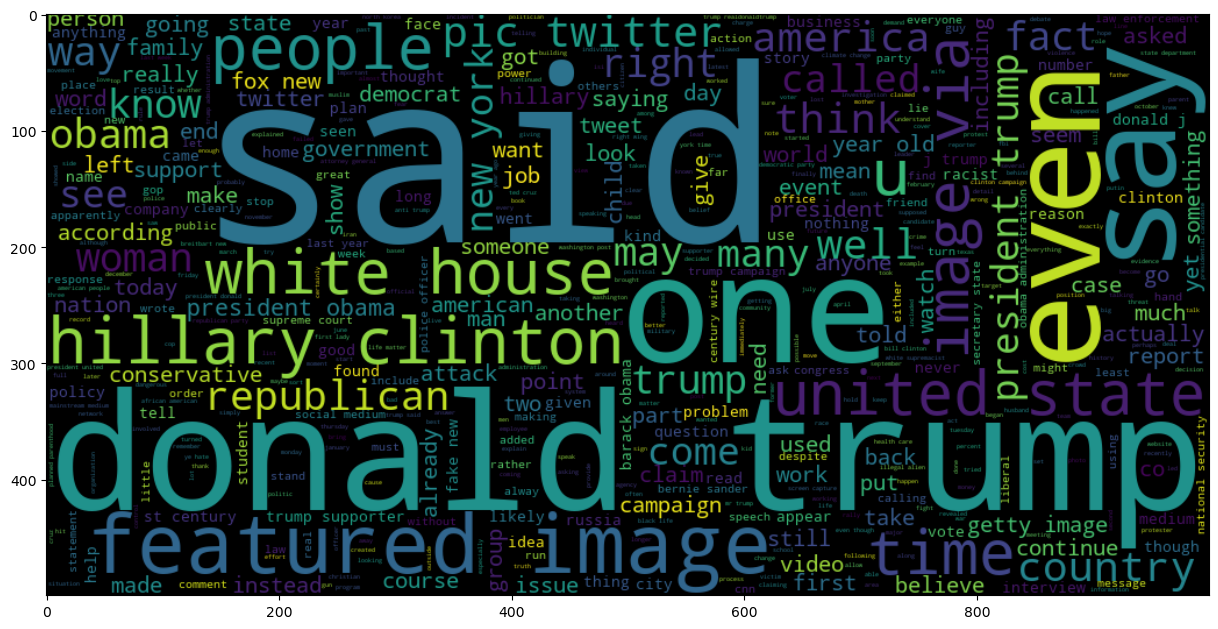

In [41]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(df[df.target == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

### <h3><b>Number of words in each text</b></h3>

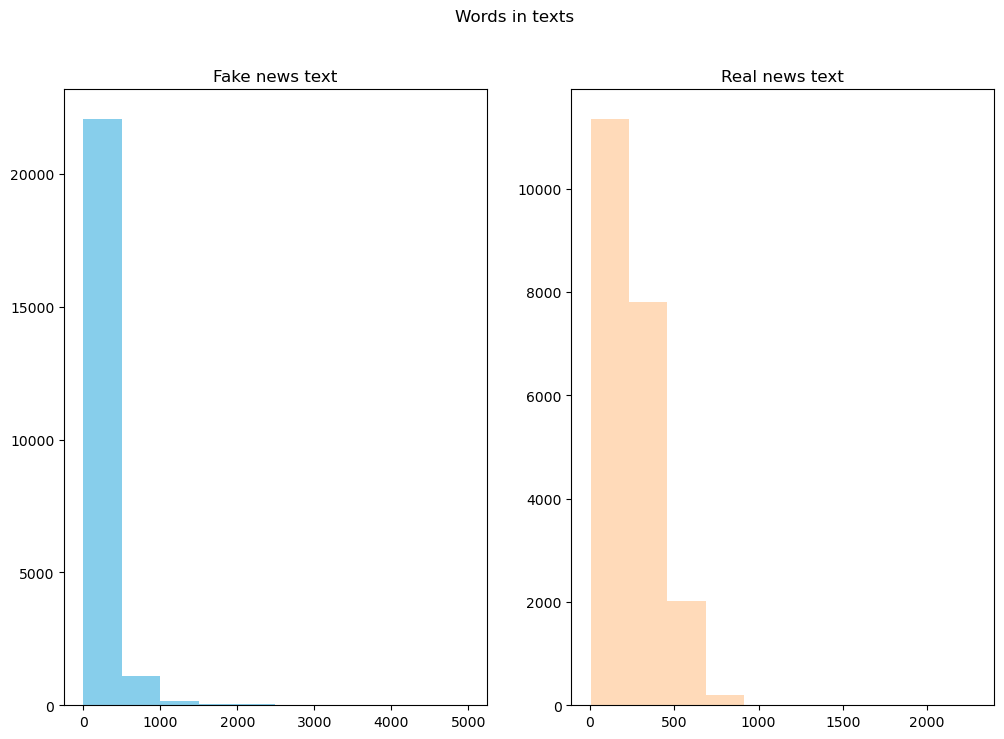

In [42]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize= (12,8))
text_len= df[df['target']== 0]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len, color= 'SkyBlue')
ax1.set_title('Fake news text')
text_len= df[df['target']== 1]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len, color= 'PeachPuff')
ax2.set_title('Real news text')
fig.suptitle('Words in texts')
plt.show()

**The number of words seems to be a bit different. 500 words  are most common in real news category while around 250 words are most common in fake news category.**

## 5.	N-Gram Analysis
•	This section involves analyzing the text data by breaking it into N-grams, which are contiguous sequences of N items.

In [43]:
texts = ' '.join(df['text'])

In [44]:
string = texts.split(" ")

In [45]:
def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (16,9))
    return sns.barplot(x='count',y='word', data=n_gram_df)

## I.	Unigram Analysis
•	Analysis is done on single words (individual tokens) in the text data.


           word   count
0      (trump,)  149601
1       (said,)  133030
2          (u,)   77733
3      (state,)   62726
4  (president,)   58790


<Axes: xlabel='count', ylabel='word'>

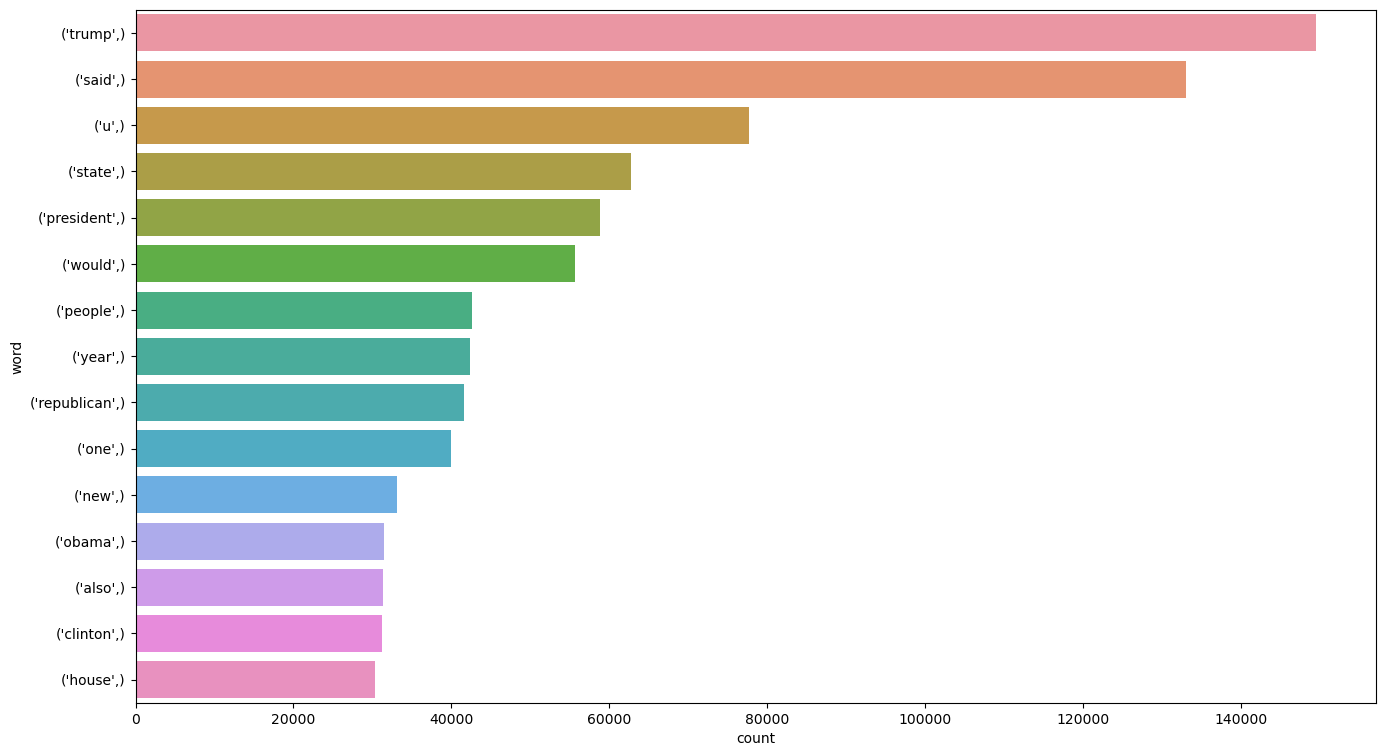

In [46]:
draw_n_gram(string,1)

## II.	Bigram Analysis
•	Analysis is done on pairs of consecutive words in the text data.


                 word  count
0     (donald, trump)  25203
1     (united, state)  18943
2      (white, house)  16296
3  (hillary, clinton)  10217
4         (new, york)   9305


<Axes: xlabel='count', ylabel='word'>

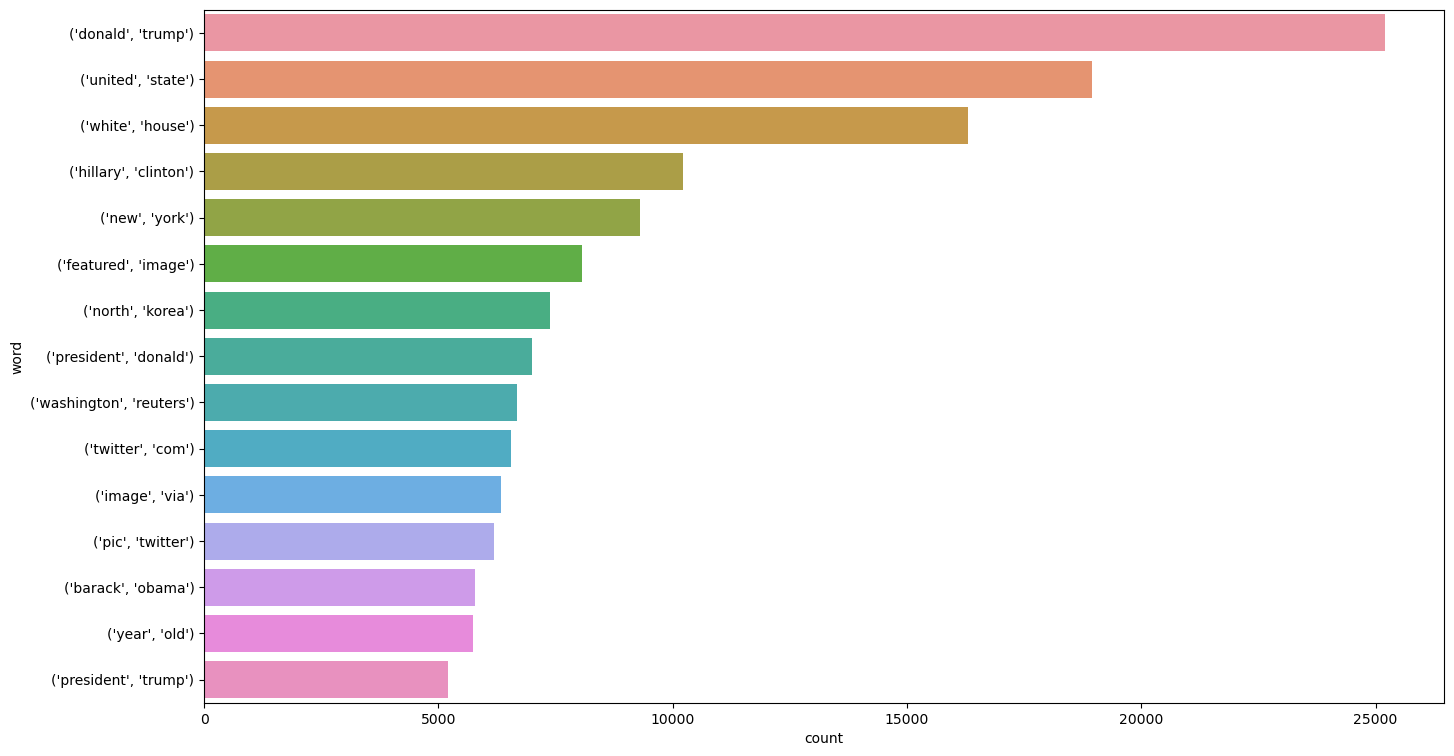

In [47]:
draw_n_gram(string,2)

## III.	Trigram Analysis
•	Analysis is done on triplets of consecutive words in the text data.

                         word  count
0  (president, donald, trump)   6830
1         (pic, twitter, com)   6185
2      (featured, image, via)   6029
3  (president, barack, obama)   3911
4      (u, president, donald)   2594


<Axes: xlabel='count', ylabel='word'>

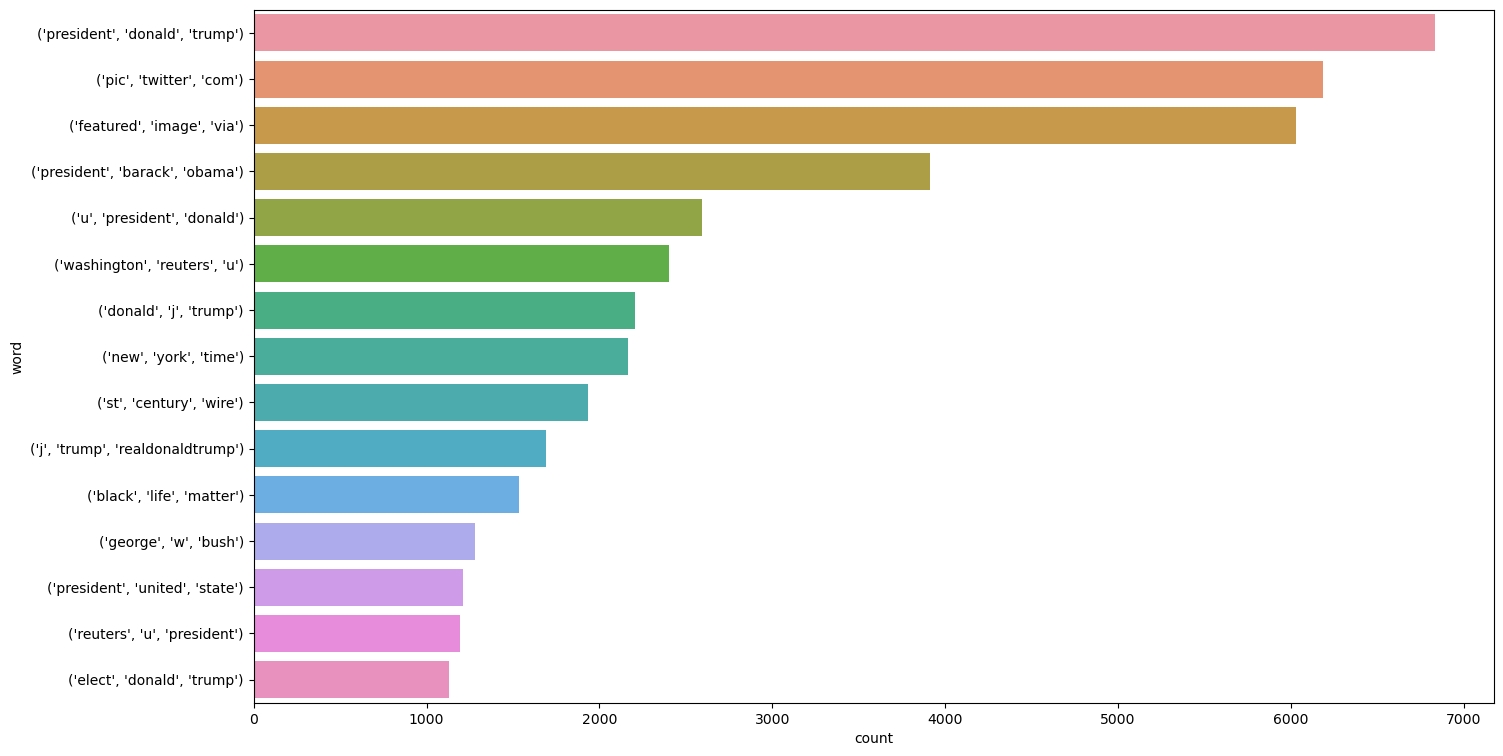

In [48]:
draw_n_gram(string,3)

## Model Building

## Train Test Split

In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [41]:
# Splitting data into features (X) and target (y)
X = df['text']
y = df['target']  # 0 for fake, 1 for real

In [42]:
# Convert text data into numerical format using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['text'])
y = df['target']

In [43]:
X

<44889x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 6014374 stored elements in Compressed Sparse Row format>

In [44]:
y

0        1
1        1
2        1
3        1
4        1
        ..
44893    0
44894    0
44895    0
44896    0
44897    0
Name: target, Length: 44889, dtype: int64

In [51]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. Logistic Regression model

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use a smaller parameter space for Logistic Regression
param_dist_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10]
}

# Initialize the Logistic Regression model
lr_model = LogisticRegression()

# Use a subset of data for testing (e.g., first 10000 samples)
subset_size = 10000
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Initialize RandomizedSearchCV for Logistic Regression
random_search_lr = RandomizedSearchCV(lr_model, param_distributions=param_dist_lr, n_iter=10, cv=5, n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV object to the training data subset
random_search_lr.fit(X_train_subset, y_train_subset)

# Get the best parameters and best estimator from the random search
best_params_lr = random_search_lr.best_params_
best_lr_model = random_search_lr.best_estimator_

# Predict on the test set using the best model
y_pred_lr = best_lr_model.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Test Accuracy:", accuracy_lr)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(conf_matrix_lr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Logistic Regression Test Accuracy: 0.9870795277344621
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4677
           1       0.98      0.99      0.99      4301

    accuracy                           0.99      8978
   macro avg       0.99      0.99      0.99      8978
weighted avg       0.99      0.99      0.99      8978

Confusion Matrix:
[[4605   72]
 [  44 4257]]


## 2. Random Forest

In [70]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Define an expanded parameter space
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 3, 5, 7],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Use a subset of data for testing (e.g., first 10000 samples)
subset_size = 10000
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Initialize RandomizedSearchCV with more iterations
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV object to the training data subset
random_search.fit(X_train_subset, y_train_subset)

# Get the best parameters and best estimator from the random search
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

# Predict on the test set using the best model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Random Forest Accuracy: 0.9955446647360214
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4677
           1       0.99      1.00      1.00      4301

    accuracy                           1.00      8978
   macro avg       1.00      1.00      1.00      8978
weighted avg       1.00      1.00      1.00      8978

Confusion Matrix:
[[4648   29]
 [  11 4290]]


## 3. SVM


In [59]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Use a subset of data for testing (e.g., first 10000 samples)
subset_size = 10000
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Initialize the SVM model
svm_model = SVC()

# Define the parameter distributions for random search
param_dist = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7))
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV object to the training data subset
random_search.fit(X_train_subset, y_train_subset)

# Get the best SVM model from the random search
best_svm_model = random_search.best_estimator_

# Predict on the test set using the best model
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the best SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Test Accuracy:", accuracy_svm)
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix_svm)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
SVM Test Accuracy: 0.9876364446424594
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4677
           1       0.99      0.99      0.99      4301

    accuracy                           0.99      8978
   macro avg       0.99      0.99      0.99      8978
weighted avg       0.99      0.99      0.99      8978

Confusion Matrix:
[[4614   63]
 [  48 4253]]


## 4. Neural Network model

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use a smaller parameter space for Neural Network
param_dist_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['logistic', 'relu'],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
}

# Initialize the Neural Network model
nn_model = MLPClassifier()

# Use a subset of data for testing (e.g., first 10000 samples)
subset_size = 10000
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Initialize RandomizedSearchCV for Neural Network
random_search_nn = RandomizedSearchCV(nn_model, param_distributions=param_dist_nn, n_iter=10, cv=5, n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV object to the training data subset
random_search_nn.fit(X_train_subset, y_train_subset)

# Get the best parameters and best estimator from the random search
best_params_nn = random_search_nn.best_params_
best_nn_model = random_search_nn.best_estimator_

# Predict on the test set using the best model
y_pred_nn = best_nn_model.predict(X_test)

# Evaluate the Neural Network model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Neural Network Test Accuracy:", accuracy_nn)

print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))

conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
print("Confusion Matrix:")
print(conf_matrix_nn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Neural Network Test Accuracy: 0.9875250612608599
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4677
           1       0.98      0.99      0.99      4301

    accuracy                           0.99      8978
   macro avg       0.99      0.99      0.99      8978
weighted avg       0.99      0.99      0.99      8978

Confusion Matrix:
[[4604   73]
 [  39 4262]]


## 5. Multinomial Naive Bayes

In [60]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use a subset of data for testing (e.g., first 10000 samples)
subset_size = 10000
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Define hyperparameter distributions for Naive Bayes
nb_param_dist = {
    'alpha': [0.1, 1.0, 10.0]
}

# Initialize Naive Bayes classifier
nb_classifier = MultinomialNB()

# Create a RandomizedSearchCV object for hyperparameter tuning
random_search_nb = RandomizedSearchCV(nb_classifier, param_distributions=nb_param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV object to the training data subset
random_search_nb.fit(X_train_subset, y_train_subset)

# Get the best Naive Bayes classifier from the random search
best_nb_classifier = random_search_nb.best_estimator_

# Predictions using the best estimator
nb_y_pred = best_nb_classifier.predict(X_test)

# Calculate accuracy
nb_test_accuracy = accuracy_score(y_test, nb_y_pred)
print("Naive Bayes Test Accuracy:", nb_test_accuracy)

# Print classification report
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_y_pred))

# Confusion Matrix
nb_conf_matrix = confusion_matrix(y_test, nb_y_pred)
print("Naive Bayes Confusion Matrix:")
print(nb_conf_matrix)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Naive Bayes Test Accuracy: 0.9328358208955224
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4677
           1       0.93      0.93      0.93      4301

    accuracy                           0.93      8978
   macro avg       0.93      0.93      0.93      8978
weighted avg       0.93      0.93      0.93      8978

Naive Bayes Confusion Matrix:
[[4383  294]
 [ 309 3992]]


## 6. Gradient Boosting

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use a subset of data for testing (e.g., first 10000 samples)
subset_size = 10000
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Define hyperparameter distributions for Gradient Boosting
gb_param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Create a RandomizedSearchCV object for hyperparameter tuning
random_search_gb = RandomizedSearchCV(gb_classifier, param_distributions=gb_param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV object to the training data subset
random_search_gb.fit(X_train_subset, y_train_subset)

# Get the best Gradient Boosting classifier from the random search
best_gb_classifier = random_search_gb.best_estimator_

# Predictions using the best estimator
gb_y_pred = best_gb_classifier.predict(X_test)

# Calculate accuracy
gb_test_accuracy = accuracy_score(y_test, gb_y_pred)
print("Gradient Boosting Test Accuracy:", gb_test_accuracy)

# Print classification report
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_y_pred))

# Confusion Matrix
gb_conf_matrix = confusion_matrix(y_test, gb_y_pred)
print("Gradient Boosting Confusion Matrix:")
print(gb_conf_matrix)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Gradient Boosting Test Accuracy: 0.9953218979728224
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4677
           1       0.99      1.00      1.00      4301

    accuracy                           1.00      8978
   macro avg       1.00      1.00      1.00      8978
weighted avg       1.00      1.00      1.00      8978

Gradient Boosting Confusion Matrix:
[[4649   28]
 [  14 4287]]


## 7. Ridge Classifier model

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use a smaller parameter space for Ridge Classifier
param_dist_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Initialize the Ridge Classifier model
ridge_model = RidgeClassifier()

# Use a subset of data for testing (e.g., first 10000 samples)
subset_size = 10000
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Initialize RandomizedSearchCV for Ridge Classifier
random_search_ridge = RandomizedSearchCV(ridge_model, param_distributions=param_dist_ridge, n_iter=10, cv=5, n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV object to the training data subset
random_search_ridge.fit(X_train_subset, y_train_subset)

# Get the best parameters and best estimator from the random search
best_params_ridge = random_search_ridge.best_params_
best_ridge_model = random_search_ridge.best_estimator_

# Predict on the test set using the best model
y_pred_ridge = best_ridge_model.predict(X_test)

# Evaluate the Ridge Classifier model
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
print("Ridge Classifier Test Accuracy:", accuracy_ridge)

print("Ridge Classifier Classification Report:")
print(classification_report(y_test, y_pred_ridge))

conf_matrix_ridge = confusion_matrix(y_test, y_pred_ridge)
print("Confusion Matrix:")
print(conf_matrix_ridge)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Ridge Classifier Test Accuracy: 0.9886388950768545
Ridge Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4677
           1       0.98      0.99      0.99      4301

    accuracy                           0.99      8978
   macro avg       0.99      0.99      0.99      8978
weighted avg       0.99      0.99      0.99      8978

Confusion Matrix:
[[4611   66]
 [  36 4265]]


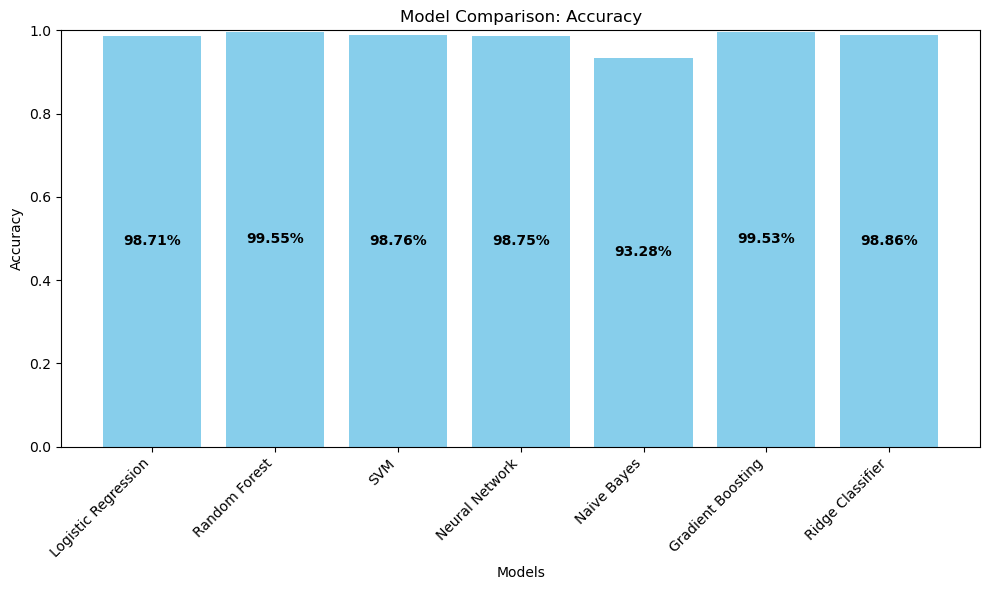

In [71]:
# List of model names and their corresponding accuracies
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Neural Network', 'Naive Bayes', 'Gradient Boosting', 'Ridge Classifier']
accuracies = [accuracy_lr, accuracy_rf, accuracy_svm, accuracy_nn,  nb_test_accuracy, gb_test_accuracy, accuracy_ridge]

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy')
plt.ylim(0, 1.0)  # Set the y-axis limit to ensure readability

# Display accuracy percentages inside the bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{acc:.2%}',
             ha='center', va='center', fontsize=10, fontweight='bold', color='black')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### confusion matrix as heatmap

In [72]:
# Define a function to plot confusion matrix as heatmap
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

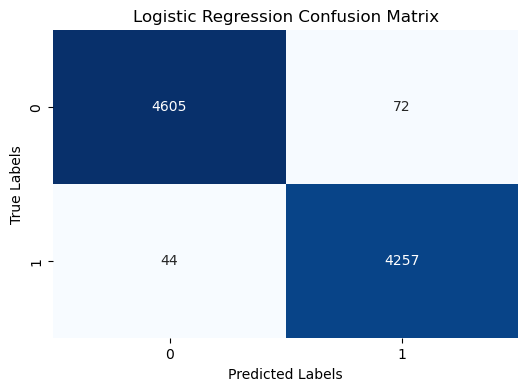

In [73]:
# Plot confusion matrices for each model
plot_confusion_matrix(conf_matrix_lr, 'Logistic Regression Confusion Matrix')

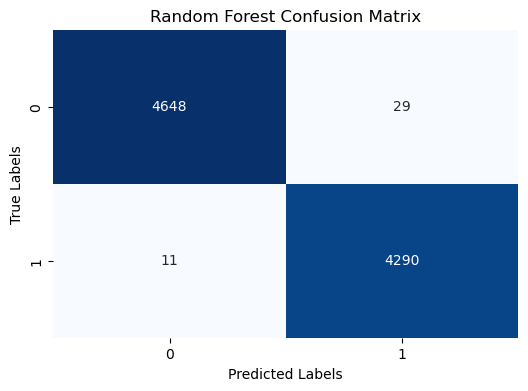

In [74]:
plot_confusion_matrix(conf_matrix_rf, 'Random Forest Confusion Matrix')

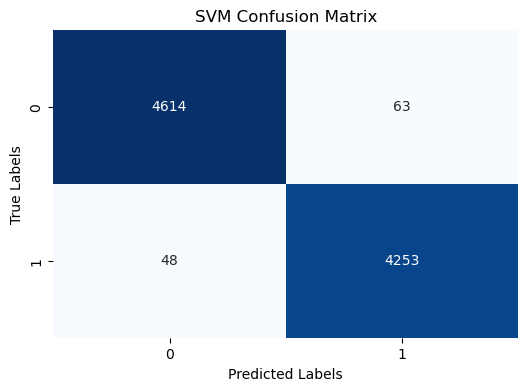

In [75]:
plot_confusion_matrix(conf_matrix_svm, 'SVM Confusion Matrix')

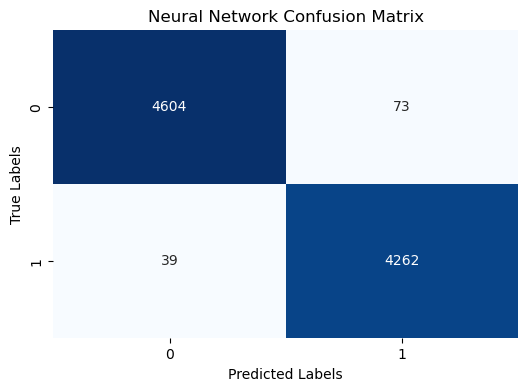

In [76]:
plot_confusion_matrix(conf_matrix_nn, 'Neural Network Confusion Matrix')

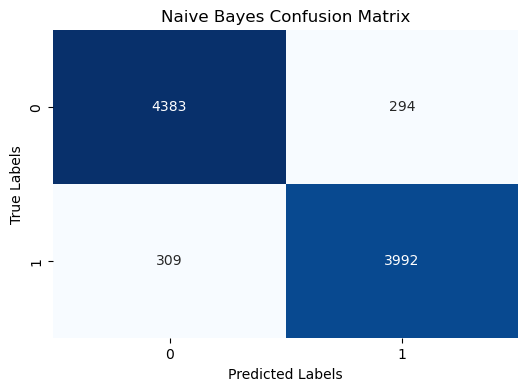

In [77]:
plot_confusion_matrix(nb_conf_matrix, 'Naive Bayes Confusion Matrix')

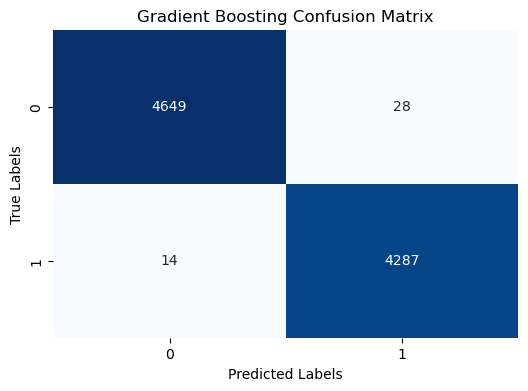

In [78]:
plot_confusion_matrix(gb_conf_matrix, 'Gradient Boosting Confusion Matrix')

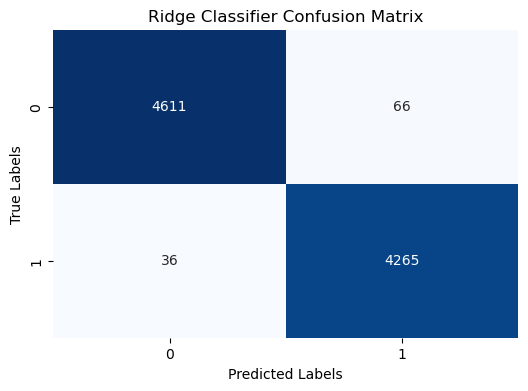

In [79]:
plot_confusion_matrix(conf_matrix_ridge, 'Ridge Classifier Confusion Matrix')

So, based on the accuracy of 99.55%, the best model is Random Forest Classifier. So, we are using this model for our deployment.

In [ ]:
# Save the TF-IDF vectorizer as a pickle file
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

In [ ]:
# Create a Pickle file using serialization
import pickle
pickle_out= open("rf_model.pkl", "wb")
pickle.dump(rf_model, pickle_out)
pickle_out.close()